<a href="https://colab.research.google.com/github/mohamedamrfarouk/arabic_dialect_classifier/blob/main/machine_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import the libraries and packedges

In [ ]:
import requests
import numpy as np
import pandas as pd
import json
import re
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import string
from time import *

# load the clean data

In [ ]:
df = pd.read_csv('/content/clean_data.csv',lineterminator='\n')

# preprocess the data to be used in training by the machine learning models


In [ ]:
vocab_size = 100000
embedding_dim = 64
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
X = df.text
y = df.dialect
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [ ]:
# yy = np.zeros((len(y), len(le.classes_)))
# for i in range(len(y)):
#   yy[i][y[i]] = 1

In [ ]:
# yy[0] , y[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_padded = np.array(training_padded)
training_labels = np.array(y_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

In [ ]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# train 3 different models and monitor some data like:
1. time taken by the model to train on the data
2. time taken to predict the testing data 
3. training accuracy
4. testing accuracy **(the most important)**

In [ ]:
def train_predict(learner, X_train, y_train, X_test, y_test): 
    
    results = {}
    
    start = time() # Get start time
    learner = learner.fit(X_train , y_train)
    end = time() # Get end time
    
    results['train_time'] = end - start
        
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    end = time() # Get end time
    
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(y_train, learner.predict(X_train))
        
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
       
    # Success
    print("{} trained on the data.".format(learner.__class__.__name__))
        
    # Return the results
    return results

In [ ]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# TODO: Initialize the three models
clf_A = LogisticRegression(random_state = 42)
clf_B = DecisionTreeClassifier(random_state = 42)
clf_C = GaussianNB()

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf, training_padded, training_labels, testing_padded, testing_labels)
    print(clf_name + " done")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression trained on the data.
LogisticRegression done
DecisionTreeClassifier trained on the data.
DecisionTreeClassifier done
GaussianNB trained on the data.
GaussianNB done


In [ ]:
results['LogisticRegression']

{'acc_test': 0.12328677433435181,
 'acc_train': 0.12380903881642284,
 'pred_time': 0.025831937789916992,
 'train_time': 89.49426102638245}

In [ ]:
names = []
models_acc_test_results = []
models_acc_train_results = []
models_train_time_results = []
models_pred_time_results = []
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    names.append(clf_name)
    models_acc_test_results.append( results[clf_name]['acc_test'])
    models_acc_train_results.append( results[clf_name]['acc_train'])
    models_train_time_results.append( results[clf_name]['train_time'])
    models_pred_time_results.append( results[clf_name]['pred_time'])

# graph the values to see the difference 

In [ ]:
import matplotlib.pyplot as plt

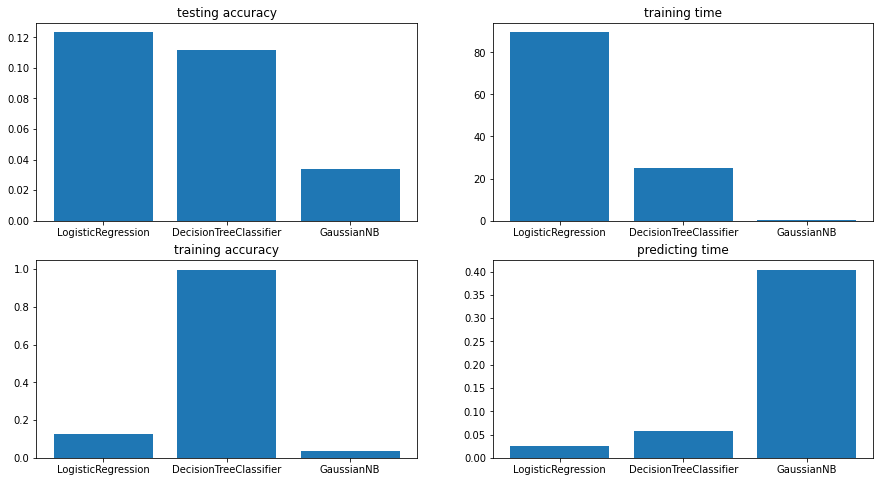

In [ ]:
fig, axs = plt.subplots(2, 2 , figsize=(15,8))
axs[0, 0].bar(names , models_acc_test_results);
axs[0, 0].set_title("testing accuracy");
axs[1, 0].bar(names , models_acc_train_results);
axs[1, 0].set_title("training accuracy")
axs[0, 1].bar(names , models_train_time_results);
axs[0, 1].set_title("training time");
axs[1, 1].bar(names , models_pred_time_results);
axs[1, 1].set_title("predicting time");


# save the best model for any future use

In [ ]:
import pickle

filename = 'machine_learning_model.sav'
pickle.dump(clf_A, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(testing_padded, testing_labels)
print(result)

0.12328677433435181
